# 1. IMPORTING LIBREARY:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import operator


from collections import Counter
from tqdm import tqdm

# 2. DATASET:

In [2]:
dataset = pd.read_csv(r'C:\Users\Abhijit\Desktop\DS\iNuron\RestaurantRatings\TA_restaurants_curated.csv')
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset.head(5)

,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


# 3. RENAME THE DATASET COLUMNS:

In [3]:
old_column_name = list(dataset.columns)
new_column_name = []
for i in range(dataset.shape[1]):
    word = dataset.columns[i].lower()
    word = re.sub(' ', '_', word)
    new_column_name.append(word)

print('old_column_name: ', old_column_name)
print('\nnew_column_name: ', new_column_name)




# Rename the dataset columns
for i in range(len(old_column_name)):
    dataset = dataset.rename(columns={old_column_name[i] : new_column_name[i]})
dataset.head(2)

old_column_name:  ['Name', 'City', 'Cuisine Style', 'Ranking', 'Rating', 'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA']

new_column_name:  ['name', 'city', 'cuisine_style', 'ranking', 'rating', 'price_range', 'number_of_reviews', 'reviews', 'url_ta', 'id_ta']


,name,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419


# 4. EDA:

### 4.1 Null values:

24 % : Null values of cuisine_style
7 % : Null values of ranking:
7 % : Null values of rating:
38 % : Null values of price_range:
13 % : Null values of number_of_reviews:
7 % : Null values of reviews:


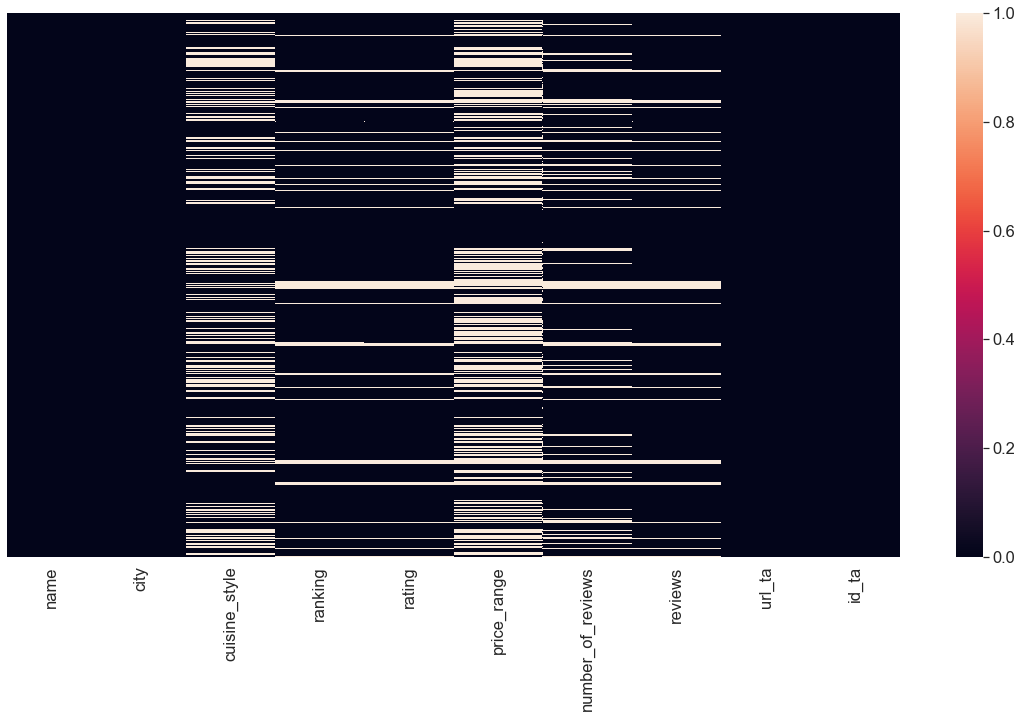

In [4]:
print(int((dict(dataset['cuisine_style'].isna().value_counts())[True] / dataset.shape[0]) * 100), '%', ': Null values of cuisine_style')
print(int((dict(dataset['ranking'].isna().value_counts())[True] / dataset.shape[0]) * 100), '% : Null values of ranking:')
print(int((dict(dataset['rating'].isna().value_counts())[True] / dataset.shape[0]) * 100), '% : Null values of rating:')
print(int((dict(dataset['price_range'].isna().value_counts())[True] / dataset.shape[0]) * 100), '% : Null values of price_range:')
print(int((dict(dataset['number_of_reviews'].isna().value_counts())[True] / dataset.shape[0]) * 100), '% : Null values of number_of_reviews:')
print(int((dict(dataset['reviews'].isna().value_counts())[True] / dataset.shape[0]) * 100), '% : Null values of reviews:', )

sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


In [5]:
print(dataset.groupby('city')['name'].value_counts())
city_names=dataset.city.unique()

city       name           
Amsterdam  New York Pizza     15
           Bagels & Beans     11
           Febo                7
           Amsterdam           6
           Burger Bar          4
                              ..
Zurich     tibits Oerlikon     1
           tre fratelli        1
           vis-a-vis           1
           xenix - summer      1
           zaehringer cafe     1
Name: name, Length: 118020, dtype: int64


### 4.2 Relation between `ranking` & `rating`:

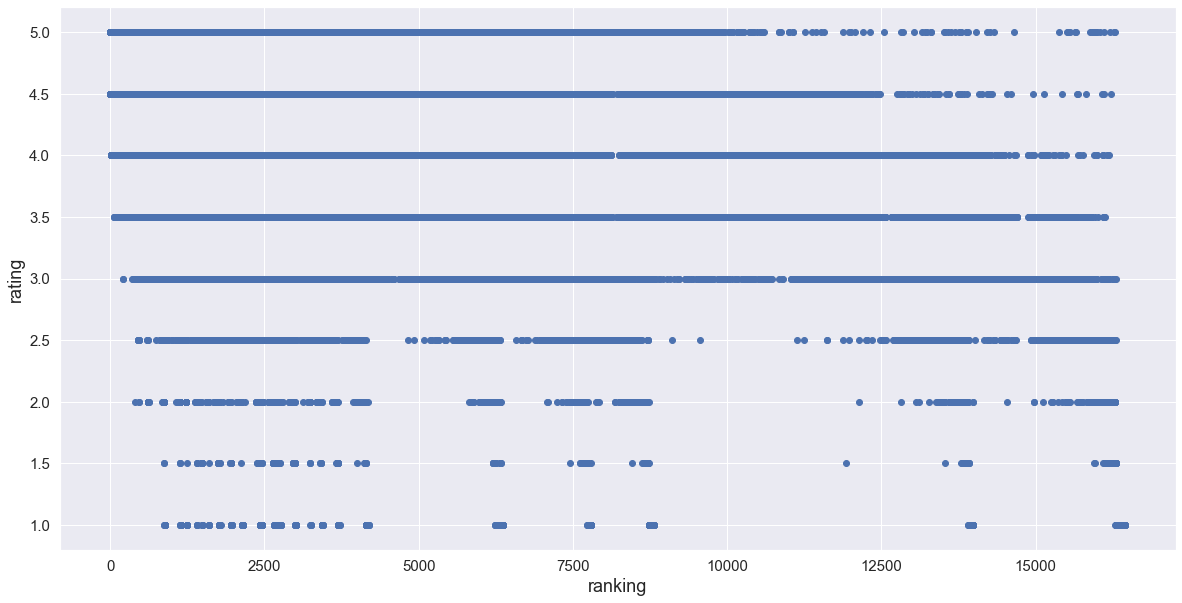

In [6]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

plt.scatter(dataset['ranking'],dataset['rating'])
plt.xlabel('ranking', fontsize=18)
plt.ylabel('rating', fontsize=18)
plt.show()

### 4.2 `rating` distribution:

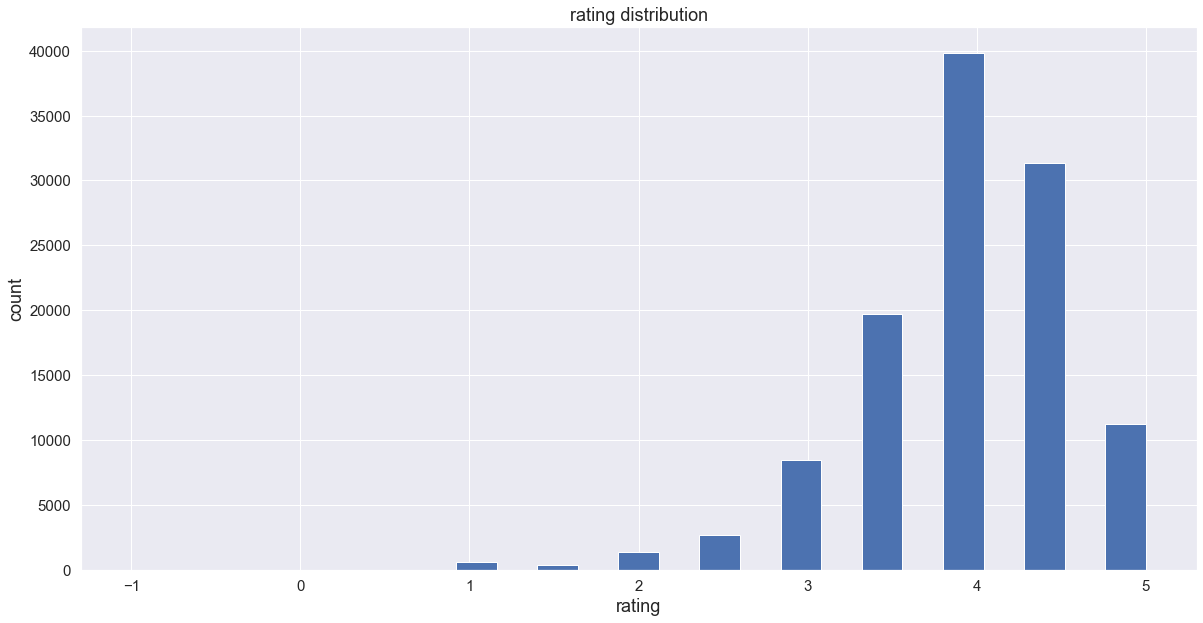

In [7]:
dataset['rating'].hist(bins=25, figsize=(20,10))
plt.xlabel('rating', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('rating distribution')
plt.show()

### 4.3 Relation between `ranking` & `counts`:

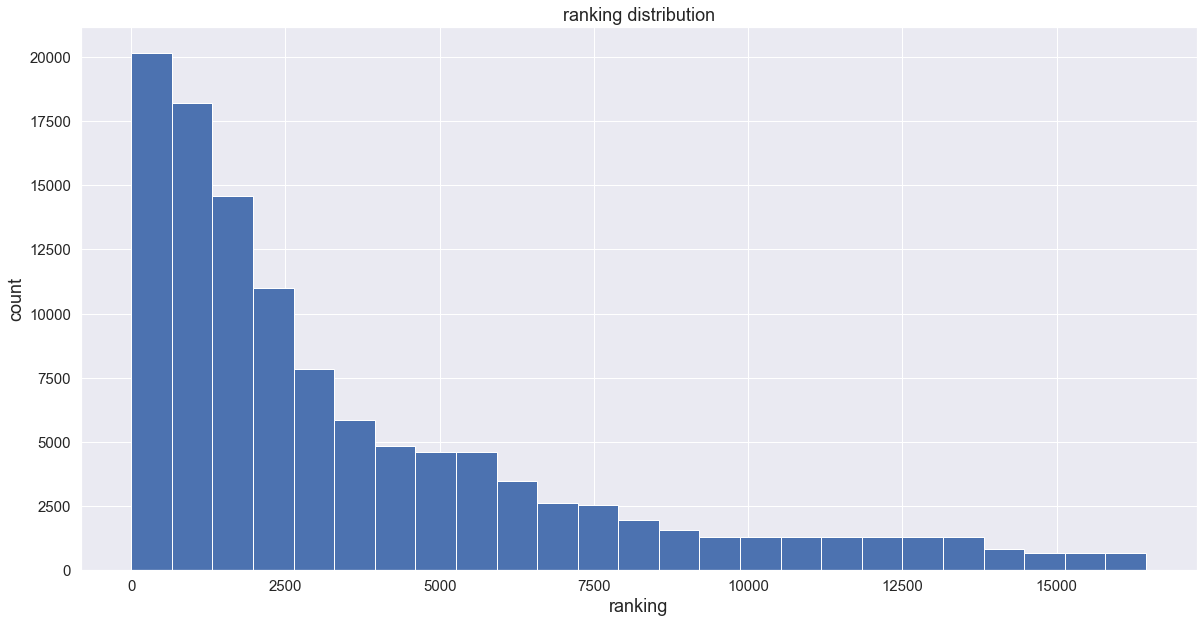

In [8]:

dataset['ranking'].hist(bins=25)
plt.xlabel('ranking', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('ranking distribution', fontsize=18)
plt.show()

### 4.4 Relation between `number_of_reviews` & `counts`:

2.0       5698
3.0       4687
4.0       3820
5.0       3388
6.0       2968
          ... 
1164.0       1
1768.0       1
2783.0       1
2677.0       1
1543.0       1
Name: number_of_reviews, Length: 2079, dtype: int64


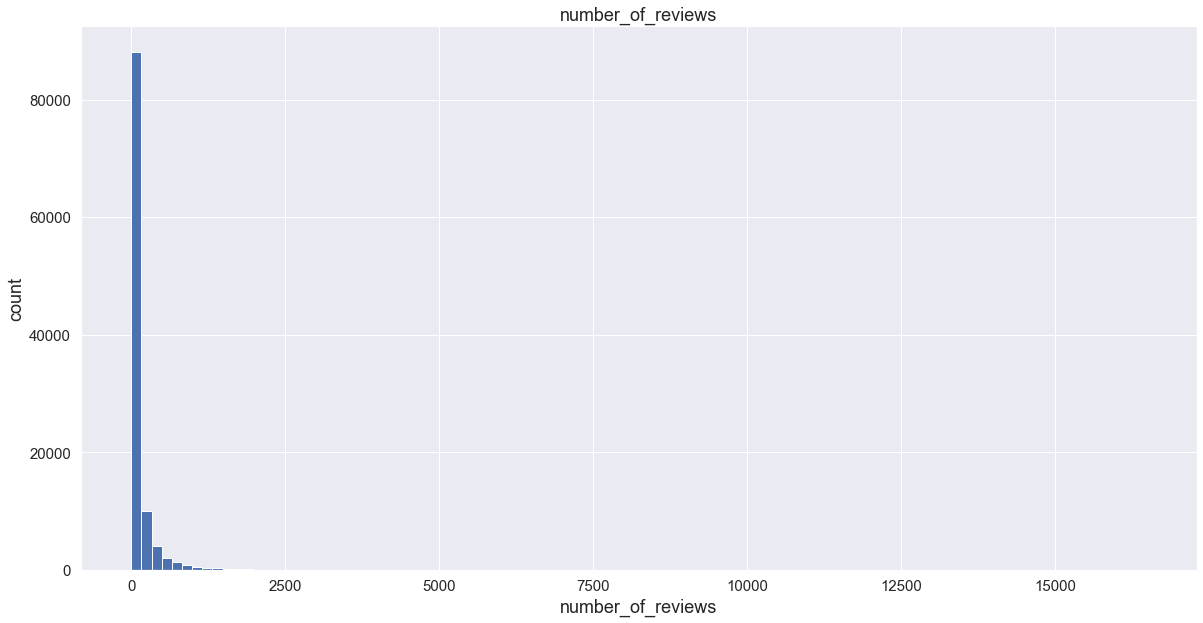

In [9]:
print(dataset['number_of_reviews'].value_counts())
dataset['number_of_reviews'].hist(bins=100)
plt.xlabel('number_of_reviews')
plt.ylabel('count')
plt.title('number_of_reviews')
plt.show()

### 4.4 Relation between `number_of_reviews` & `ranking`:

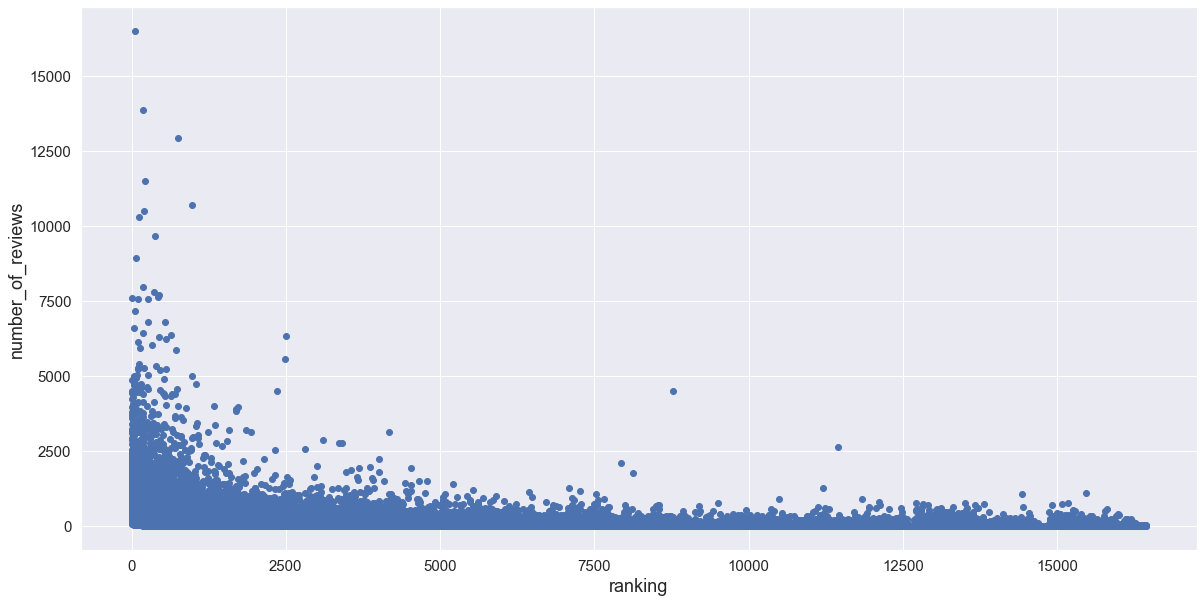

In [10]:
plt.scatter(dataset['ranking'],dataset['number_of_reviews'])
plt.xlabel('ranking')
plt.ylabel('number_of_reviews')
plt.show()

# 5. INITIAL NULL VALUES:

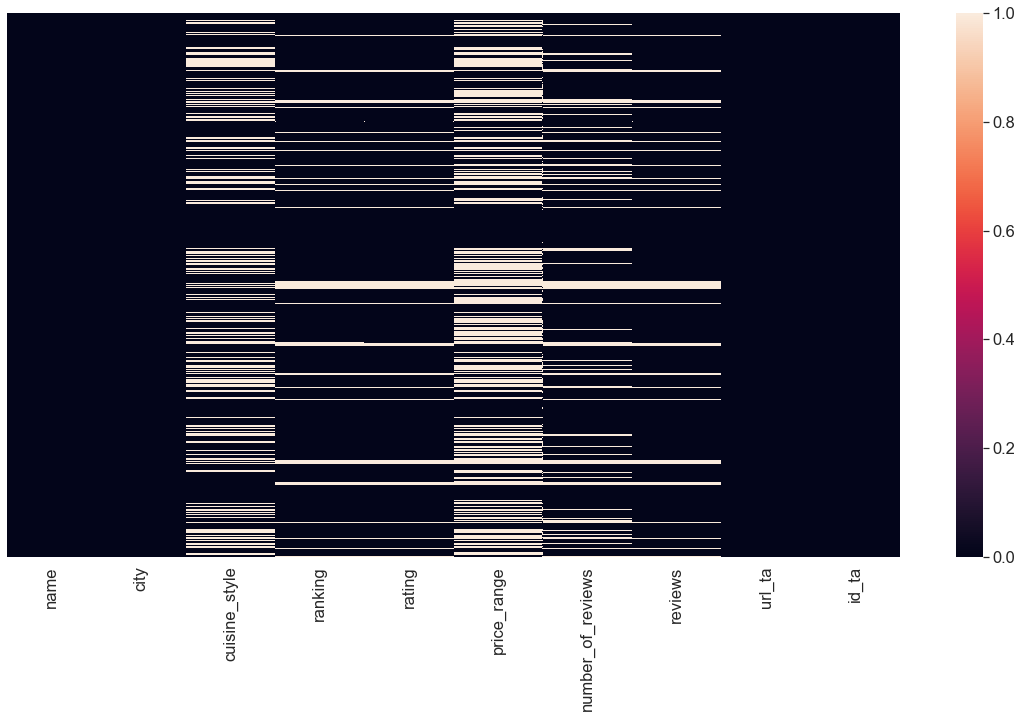

In [11]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5)
sns.heatmap(dataset.isnull(), yticklabels=False)

# 6. NULL VALUE REPLACEMENT: `cuisine_style` 

In [12]:
# Python3 program to ways to convert 
# list enclosed within string to list 

def convert(lst):
	return eval(lst)

**In this shell we are converting all the `cuisine_style` name to lower case.**

In [13]:
# for i in tqdm(range(dataset.shape[0])):
#     if type(dataset['cuisine_style'][i]) == str:
#         temp_list = []
#         for word in convert(dataset['cuisine_style'][i]):
#             word = word.lower()
#             word = re.sub(' ', '_', word)
#             temp_list.append(word)
#         dataset.loc[i, 'cuisine_style'] = str(temp_list)
#     else:
#         pass
# dataset.to_csv(r'C:\Users\Abhijit\Desktop\DS\iNuron\RestaurantRatings\check_point1.csv')

**Above shell is taking toomuch time so I save this file to `check_point1.csv`**

In [14]:
dataset = pd.read_csv(r'C:\Users\Abhijit\Desktop\DS\iNuron\RestaurantRatings\check_point1.csv')

**Creating new unique `cuisine_style_list`**

In [15]:
cuisine_style_list = []
for i in tqdm(range(dataset.shape[0])):
    if type(dataset['cuisine_style'][i]) == str:
        cuisine_style_list.extend(convert(dataset['cuisine_style'][i]))
    else:
        pass

100%|███████████████████████████████████████████████████████████████████████| 125527/125527 [00:04<00:00, 30287.05it/s]


In [16]:
dataset['cuisine_style'].isna().value_counts()

False    94176
True     31351
Name: cuisine_style, dtype: int64

In [17]:
unique_cuisine_style_dict = dict(Counter(cuisine_style_list))
unique_cuisine_style_dict = dict(sorted(unique_cuisine_style_dict.items(), key=operator.itemgetter(1), reverse=True))
unique_cuisine_style_dict

{'vegetarian_friendly': 32361,
 'european': 30228,
 'mediterranean': 18428,
 'italian': 17795,
 'vegan_options': 13009,
 'gluten_free_options': 12120,
 'bar': 9690,
 'french': 9558,
 'asian': 9064,
 'pizza': 8317,
 'spanish': 8220,
 'pub': 7404,
 'cafe': 7392,
 'fast_food': 5113,
 'british': 4836,
 'international': 4807,
 'japanese': 4483,
 'seafood': 4405,
 'central_european': 4160,
 'american': 4052,
 'chinese': 3690,
 'sushi': 3487,
 'portuguese': 3296,
 'indian': 3117,
 'middle_eastern': 2339,
 'thai': 2300,
 'wine_bar': 2259,
 'german': 2075,
 'czech': 1937,
 'greek': 1923,
 'healthy': 1909,
 'fusion': 1868,
 'steakhouse': 1692,
 'barbecue': 1676,
 'halal': 1672,
 'soups': 1653,
 'contemporary': 1619,
 'grill': 1592,
 'vietnamese': 1574,
 'eastern_european': 1470,
 'gastropub': 1462,
 'turkish': 1416,
 'mexican': 1387,
 'south_american': 1230,
 'austrian': 1183,
 'delicatessen': 1155,
 'polish': 1122,
 'hungarian': 1094,
 'scandinavian': 1038,
 'diner': 989,
 'lebanese': 904,
 'du

**Most popular dish is `vegetarian_friendly`**

**So we can use the mode value replacement**

In [18]:
for i in tqdm(range(dataset.shape[0])):
    if type(dataset['cuisine_style'][i]) == str:
        pass
    else:
        dataset.loc[i, 'cuisine_style'] = str(['vegetarian_friendly'])

100%|████████████████████████████████████████████████████████████████████████| 125527/125527 [01:13<00:00, 1712.50it/s]


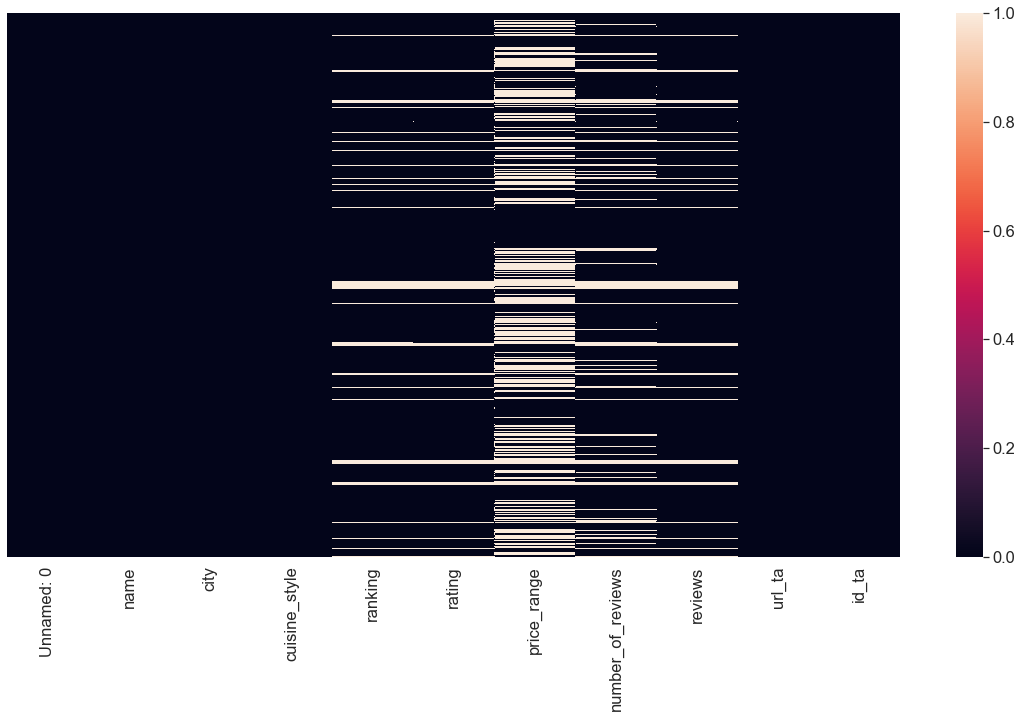

In [19]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


In [20]:
# dataset.to_csv(r'C:\Users\Abhijit\Desktop\DS\iNuron\RestaurantRatings\check_point2.csv')
dataset = pd.read_csv(r'C:\Users\Abhijit\Desktop\DS\iNuron\RestaurantRatings\check_point2.csv')

# 7. NULL VALUE REPLACEMENT: `number_of_reviews`

**1st we will `delete outlier` data points then apply the `mean value` replacement.**

In [21]:
number_of_reviews_np = np.array(dataset['ranking'])
per_25th = np.percentile(number_of_reviews_np, 25)
per_75th = np.percentile(number_of_reviews_np, 75)
IQR = per_75th - per_25th
lower_bound = per_25th - 1.5*IQR
upper_bound = per_75th + 1.5*IQR

dataset = dataset[(dataset["ranking"] < upper_bound) & (dataset["ranking"] > lower_bound)]

**There are `17344` null values in `number_of_reviews`**

In [22]:
dataset['number_of_reviews'].isna().value_counts()

Series([], Name: number_of_reviews, dtype: int64)

In [23]:
dataset['number_of_reviews']

Series([], Name: number_of_reviews, dtype: float64)

**So we can use the `mean value` replacement**

In [24]:
dataset['number_of_reviews'] = dataset['number_of_reviews'].fillna(dataset['number_of_reviews'].mean())

In [25]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


ValueError: zero-size array to reduction operation minimum which has no identity

# 8. NULL VALUE REPLACEMENT: `price_range`

**There are `47855` null values in `price_range`**

In [ ]:
dataset['price_range'].isna().value_counts()

**So we can use the `mode value` replacement**

In [ ]:
dataset['price_range'] = dataset['price_range'].fillna(dataset['price_range'].mode()[0])

In [ ]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


# 9. NULL VALUE REPLACEMENT: `reviews`

**Here we will `delete all rows` because it is a text data column we `can't use mean, median, mode value replacement`**

In [ ]:
dataset['reviews']

In [ ]:
dataset['reviews'].isna().value_counts()

In [ ]:
# dataset['reviews'].dropna(axis=0, inplace=True)
dataset = dataset[dataset['reviews'].notna()]

In [ ]:
dataset['reviews']

In [ ]:
dataset['reviews'].isna().value_counts()

In [ ]:
dataset.isna().sum()

In [ ]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


# 10. NULL VALUE REPLACEMENT:  `ranking`

**We can elemenate the null rows because only 164 null rows our of 115K rows**

In [ ]:
dataset['ranking']

In [ ]:
dataset = dataset[dataset['ranking'].notna()]

In [ ]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.set(font_scale=1.5) 
sns.heatmap(dataset.isnull(), yticklabels=False)


In [ ]:
dataset.isna().sum()

In [ ]:
# dataset.to_csv(r'C:\Users\Abhijit\Desktop\DS\iNuron\RestaurantRatings\check_point3.csv')
dataset = pd.read_csv(r'C:\Users\Abhijit\Desktop\DS\iNuron\RestaurantRatings\check_point3.csv')
dataset.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1, inplace=True)

In [ ]:
dataset